In [1]:
import sys
sys.path.append("../")

In [2]:
%pylab inline

import logging as log
import fiona, shapely
from shapely.geometry import LineString, MultiPolygon
from shapely.ops import polygonize
import mappy as mpy
import geopandas


mpl.rcParams['figure.figsize'] = [12, 10.0]


# vector layer with contacts
contacts = "../input_data/contacts" # contacts also contain the boundind box.


# here are a vector layer with points. each points need to have a field with an unique id for each geological unit
unit_id = "../input_data/unit_id"
unit_uuid_name = "unit_name" # the name of the field to use to populate the map.

# output data - geopackage
outputfname = "./output-map-data.gpkg"

dist = 1.0 # extend of 1 meters all the extreme segments of contacts - needed to ensure proper intersections

import os # we also use this example for generating images for the readme.
figdir = "../images/"
os.makedirs(figdir, exist_ok=True)

Populating the interactive namespace from numpy and matplotlib
 import mappy
 mappy logging imported
 trying geopandas imported
 geopandas imported
 matplotlib imported
 mappy plotting imported
 mappy geom_ops imported
 mappy checks imported
 mappy mappy_construct imported


In [8]:
cts= geopandas.GeoDataFrame.from_file(contacts)
units = geopandas.GeoDataFrame.from_file(unit_id)

In [9]:
units

,id,unit_name,geometry
0,None,x,POINT (3511.606 -1987.229)
1,None,x,POINT (2264.053 -2257.863)
2,None,e,POINT (2607.295 -1723.197)
3,None,e,POINT (2468.678 -2601.105)
4,None,d,POINT (2844.924 -2944.347)
5,None,d,POINT (3425.795 -2779.327)
6,None,c,POINT (3424.145 -3188.577)
7,None,y,POINT (4062.773 -1327.148)
8,None,y,POINT (3174.964 -478.944)
9,None,c,POINT (3196.417 -1129.124)


In [10]:
cts = cts[cts.geometry.values != None] # remove null geometries

# plot the input dataset - contacts and points

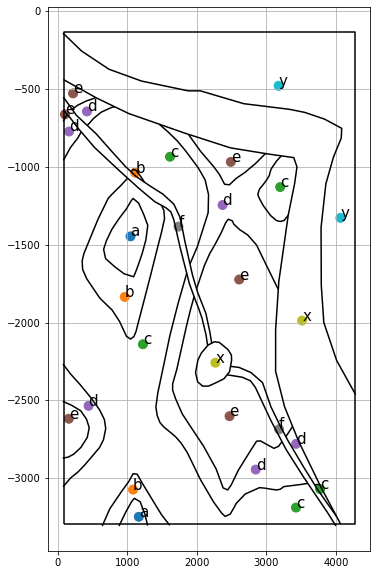

In [11]:
mpy.plot_contacts_and_units_points(cts, units, unit_uuid_name)

In [12]:
mpy.mappy_construct?

Signature:
mpy.mappy_construct(
    lines: geopandas.geodataframe.GeoDataFrame,
    points: geopandas.geodataframe.GeoDataFrame,
    output: str,
    units_field: str,
    layer_name='geomap',
    auto_extend=0,
    overwrite=False,
    debug=False,
)
Docstring: <no docstring>
File:      /run/media/luca/data/Code/mappy.git/mappy/geom_ops.py
Type:      function


In [13]:
mpy.mappy_construct?

Signature:
mpy.mappy_construct(
    lines: geopandas.geodataframe.GeoDataFrame,
    points: geopandas.geodataframe.GeoDataFrame,
    output: str,
    units_field: str,
    layer_name='geomap',
    auto_extend=0,
    overwrite=False,
    debug=False,
)
Docstring: <no docstring>
File:      /run/media/luca/data/Code/mappy.git/mappy/geom_ops.py
Type:      function


In [14]:
mpy.mappy_construct(cts, units, "/home/luca/aa.gpkg",unit_uuid_name, auto_extend=10, overwrite=True, debug=True)

shape is closed. skip - no need to extend it
shape is closed. skip - no need to extend it
shape is closed. skip - no need to extend it
more than two points were found in the same polygon
no prob, because point to the same unit
more than two points were found in the same polygon
no prob, because point to the same unit


{'layers': [                                             geometry
  0   LINESTRING (62.702 -135.215, 71.881 -139.182, ...
  1   LINESTRING (4073.771 -3301.099, 4066.125 -3294...
  2   LINESTRING (2063.605 -2194.949, 2153.773 -2148...
  3   LINESTRING (69.716 -545.648, 78.205 -550.934, ...
  4   LINESTRING (2157.000 -2157.534, 2153.773 -2148...
  5   LINESTRING (629.780 -3314.722, 636.798 -3307.5...
  6   LINESTRING (870.351 -3314.349, 877.728 -3307.5...
  7   LINESTRING (63.786 -2261.289, 72.429 -2266.320...
  8   LINESTRING (59.328 -2503.614, 69.129 -2505.599...
  9   LINESTRING (1867.764 -784.705, 1876.251 -789.9...
  10  LINESTRING (3221.913 -924.282, 3212.930 -928.6...
  11  LINESTRING (2472.650 -2280.458, 2482.633 -2281...
  12  LINESTRING (4005.566 -3312.234, 3997.436 -3306...
  13  LINESTRING (776.240 -1400.428, 880.203 -1331.1...
  14  LINESTRING (69.043 -713.944, 76.554 -707.343, ...
  15  LINESTRING (72.115 -963.681, 79.855 -957.348, ...
  16  LINESTRING (195.530 -633.127, 20

In [10]:
out = mpy.extend_lines(cts, 22)

shape is closed. skip - no need to extend it
shape is closed. skip - no need to extend it
shape is closed. skip - no need to extend it


<AxesSubplot:>

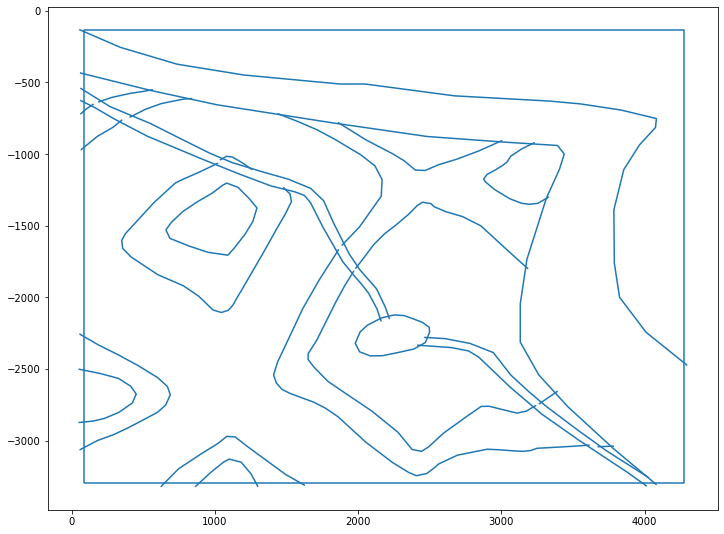

In [11]:
out.plot() # have a look at the extended lines dataset

# Create a fast view of intersections so we can evaluate if the extension worked out fine

In [12]:


intersections = mpy.compute_self_intersections_points(cts)

# and plot 

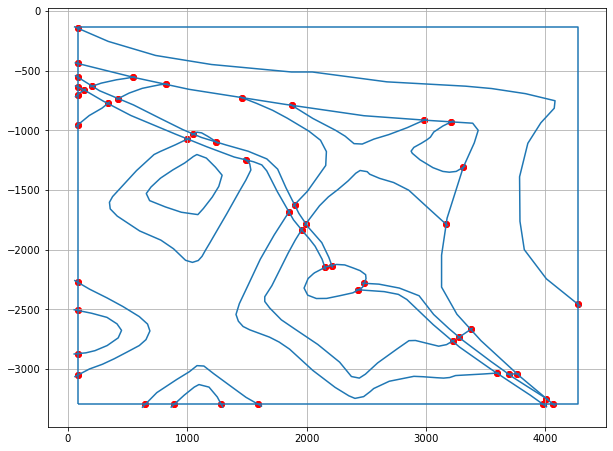

In [13]:
figure(figsize=(10,10))
intersections.plot(color="r", ax=gca())
out.plot(ax=gca())
grid()

# and save the intersection in the output geopackage for external evaluation

In [14]:
# intersections.to_file(outputfname , layer="intersections", driver="GPKG")

# now go ahead with polygonize

In [15]:

polygons = mpy.polygonize(out)

# do a plot

<AxesSubplot:>

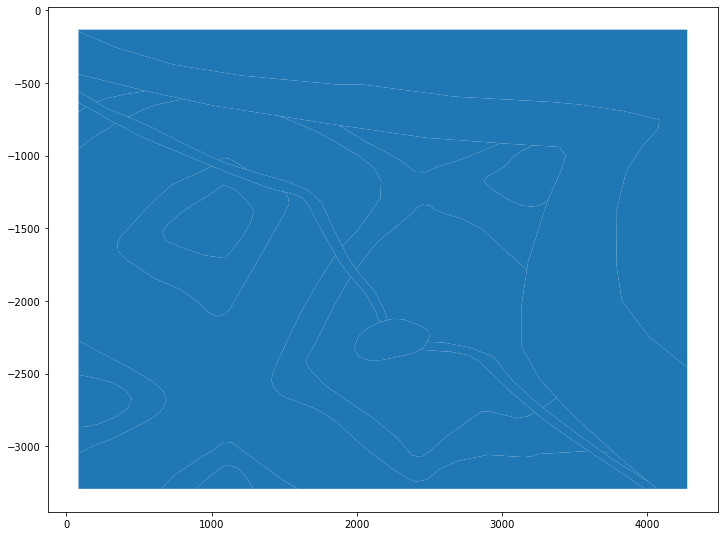

In [16]:
polygons.plot()

# and save to output geopackage

In [17]:
polygons.to_file(outputfname , layer="polygons", driver="GPKG")

# now we associate a point for each polygon
It is very likely that we could do this with a spatial join, but this gives us better control for performing checks on the consistency

In [18]:
polygons = mpy.transfer_units_to_polygons(polygons, units, unit_uuid_name)

more than two points were found in the same polygon
no prob, because point to the same unit
more than two points were found in the same polygon
no prob, because point to the same unit


# see result for some validation

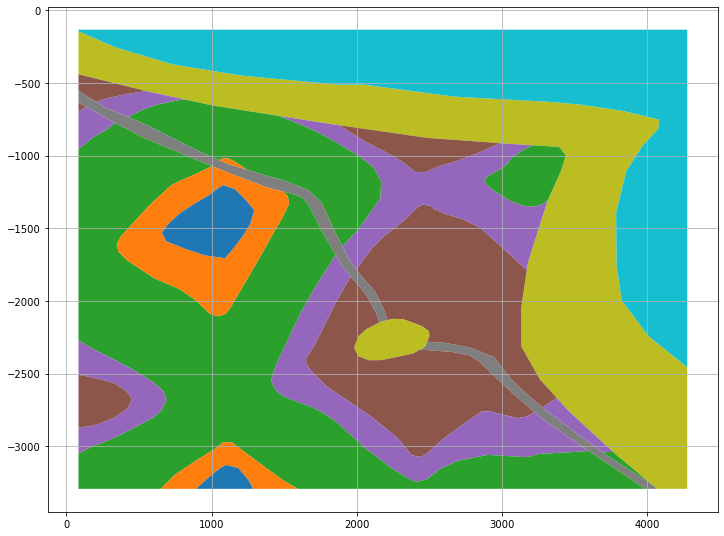

In [19]:
polygons.plot(column=unit_uuid_name)
grid()
savefig(os.path.join(figdir, "output_map.png"))

# save

In [20]:
polygons.to_file(outputfname , layer="polygons_labelled", driver="GPKG")